## <span style="font-family: Arial;font-size:1.2em;color:#3366ff"> Machine Learning Project with Company Bankruptcy Prediction !
    

**Goal** : The main goal of this project is to use several BASELINE machine learning techniques such as ,KNN, LR, SVM etc. to identify whether the compancy with different accounting indicator has bankrupted or not and compare the f1-score for Bankruptcy with these techniques to find the best one.The reason that I did not do much optimal hyperparameter searching is because I first constucted a hyperparameter grid and applied like GridSearch and Recursive Feature Elimination (aka RFE) to find the optimas but it costs too much computer powers and my laptop was complaining me in angrt.But I do tried several models to apply GridSearch, pusedocodes as follows:
```python
params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


svm = SVC(probability = True)
svm = GridSearchCV(svm, params)
```
    
    
    
Tasks:
1. Split the data provided in the previous link into training, validation, and testing sets.
2. Analyze these data sets using different methods we learned in our class. You are
expected to use at least three methods.
3. Report the performance (accuracy, F1-score, AUC) for each of your algorithms on the
testing data.

## Author : SHI BO

## BU ID : U56082126

## Date : 3/10/2021

### <span style="font-family: Arial;font-size:1.2em;color:#3366ff"> Potential problems with dataset

For example:
* **To many X-variables**
* **Unbalanced class**
* **Variables probably correlated**
* **Latent outliers**

### <span style="font-family: Arial;font-size:1.2em;color:#3366ff"> ML techniques used:

<Mark>There are the links that you can quickly navigate to the overall evaluations like AUC, ROC curve and so on.<Mark>
* <a href="#DNN">DNN</a>
* <a href="#LogisticRegression">LogisticRegression</a>
* <a href="#SVM">SVM</a>
* <a href="#KNN">KNN</a>
* <a href="#XGBoost">XGBoost</a>
* <a href="#DecisionTree">DecisionTree</a>
* <a href="#RandomForest">RandomForest</a>
* <a href="#GradientBoosting">GradientBoosting</a>
* <a href="#MLP">MLP</a>
* <a href="#CatBoostClassifier">CatBoostClassifier</a>

## <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Index

* <a href="#Packages">Packages</a>
* <a href="#ExploratoryDataAnalysis">ExploratoryDataAnalysis</a>
* <a href="#Class-imbalance">Class imbalance</a>
* <a href="#Oversampling">Oversampling</a>(Finished coding but not used actually, since did not improve f1-score)
* <a href="#OutliersRemoval">OutliersRemoval</a>(Dropped cuz no help for final result and changed original dataset)
* <a href="#DimensionReduction">DimensionReduction</a>
* <a href="#Scaling">Scaling</a>
* <a href="#Implementation">Implementation</a>

## <center><span style="font-family: Arial;font-size:1.2em;color:#3366ff">***FinalResults***
    
| Method | Accuracy | Precision | Recall | AUC | F1-score (Label = 1)|
| --- | --- | --- | --- | --- | --- |
| DNN | 0.96 | 0.92 | 1.00 | 0.96 | <center>**0.09** |
| LR | 0.91 | 0.91 | 0.92 | 0.96 | <center>**0.29** |
| SVM | 0.91 | 0.90 | 0.93 | 0.97 | <center>**0.24** |
| KNN | 0.95 | 0.91 | 1.00 | 0.98 | <center>**0.24** |
| XGBoost | 0.99 | 0.98 | 1.00 | 1.00 | <center><Mark>**0.53**<Mark> |
| DecisionTree | 0.94 | 0.93 | 0.96 | 0.94 | <center>**0.33** |
| RandomForest | 0.98 | 0.96 | 1.00 | 1.00 | <center>**0.25** |
| GradientBoosting | 0.95 | 0.94 | 0.97 | 0.99 | <center>**0.38** |
| MLP | 0.95 | 0.93 | 0.98 | 0.98 | <center>**0.25** |
| CatBoosting | 0.98 | 0.97 | 1.00 | 1.00 | <center>**0.33** |


<center>**There is no doubt that the XGBoost wins this game!!!!!**

# <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from xgboost import plot_tree, plot_importance

from sklearn.model_selection import train_test_split
import scikitplot as skplt # Package for ROC vurve
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, f1_score,auc,roc_curve,roc_auc_score, precision_recall_curve

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.decomposition import PCA

### <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Enveloped Model Evaluation Functions

In [2]:
def evaluation(y_true, y_pred):
    precision_micro = precision_score(y_true, y_pred, average='micro')
    recall_micro = recall_score(y_true, y_pred, average='micro')
    f1_micro = f1_score(y_true, y_pred, average='micro')
    print(100*"*")
    print("precision_micro:",precision_micro,end="\t")
    print("recall_micro:",recall_micro,end="\t")
    print("f1_micro:",f1_micro)
    precision_macro = precision_score(y_true, y_pred, average='macro')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    f1_macro = f1_score(y_true, y_pred, average='macro')
    print("precision_macro:",precision_macro,end="\t")
    print("recall_macro:",recall_macro,end="\t")
    print("f1_macro:",f1_macro)
    print(100*"*")

    return f1_macro

def model_eval(algo,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_train_ypred = algo.predict(X_train)
    y_train_prob = algo.predict_proba(X_train)[:,-1]

    #TEST
    y_test_ypred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,-1]
    y_probas = algo.predict_proba(X_test)
    auc = metrics.roc_auc_score(y_test,y_test_prob)
    print("auc:",auc)
    acc_score = accuracy_score(y_test, y_test_ypred)
    print("accuracy score:",acc_score)
    #Confussion Matrix
    plot_confusion_matrix(algo, X_test, y_test)
#   plt.show() 
    print('='*100)
    evaluation(y_test,y_test_ypred)
    print('='*100)
    print('Classification Report: \n', classification_report(y_test, y_test_ypred, digits=3))
    print('='*100)
    
#     ROC Curve
    fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
    skplt.metrics.plot_roc(y_test, y_probas,figsize=(8,6) )
    
#     PR Curve
    skplt.metrics.plot_precision_recall(y_test, y_probas, figsize=(8,6))


# <span style="font-family: Arial;font-size:1.2em;color:#3366ff">ExploratoryDataAnalysis

In [3]:
data = pd.read_csv("./data/data.csv",encoding="utf_8_sig")
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

## <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Missing Values

In [4]:
missing = data.isna().sum(axis = 1).reset_index();missing.columns = ['Variables','Missing Value']
missing = missing.sort_values("Missing Value",ascending = False)
if ((missing["Missing Value"] > 0 ).sum()) == 0:
    print("There is no missing values in dataset")
missing

There is no missing values in dataset


Variables  Missing Value
0             0              0
4554       4554              0
4552       4552              0
4551       4551              0
4550       4550              0
...         ...            ...
2270       2270              0
2269       2269              0
2268       2268              0
2267       2267              0
6818       6818              0

[6819 rows x 2 columns]

## <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Correlation Map

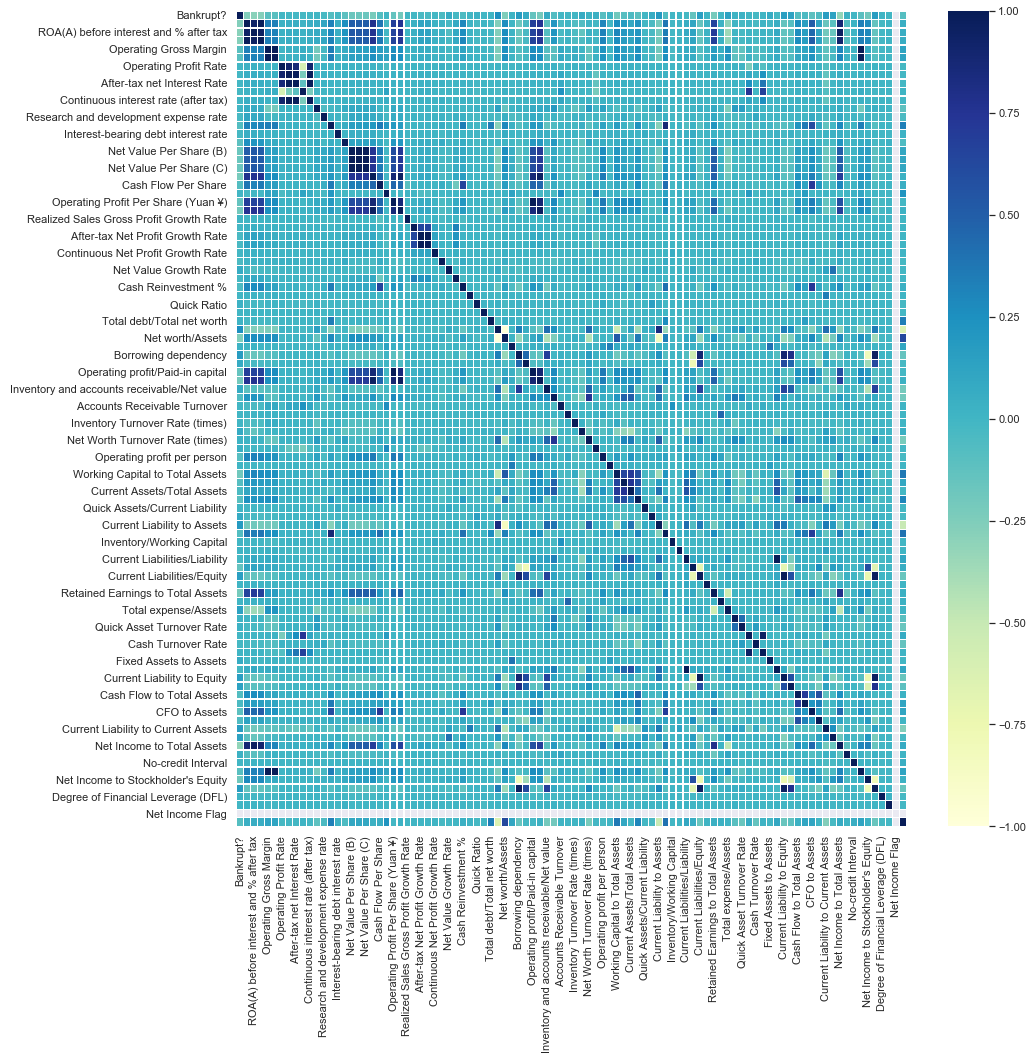

In [5]:
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(data.corr(), ax = ax, cmap = 'YlGnBu', linewidth = 0.1)

# <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Class imbalance
    
There is a imbalance in our data, we should focus on "Label == 1" f1-score.

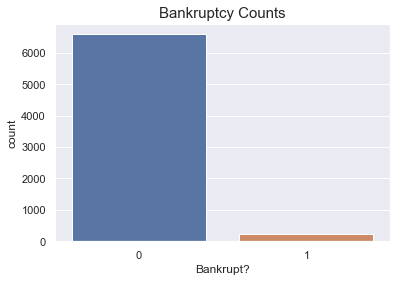

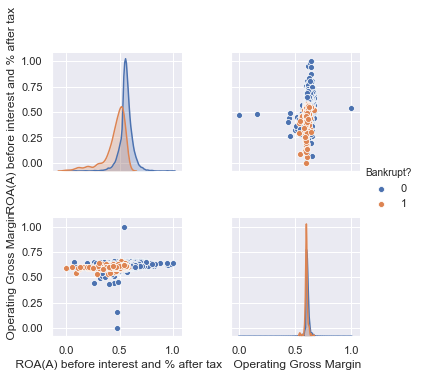

In [43]:
sns.countplot(data=data, x='Bankrupt?')
plt.title('Bankruptcy Counts', fontsize = 15)
plt.show()

pair = sns.pairplot(data = data.iloc[:,0:5:2], hue = 'Bankrupt?')
plt.show()

In [262]:
X = data.drop(["Bankrupt?"],axis=1)
y = data["Bankrupt?"].values

Most of the features are uncorrelated with each other but there are also few of them correlated

so that we could use PCA to reduce the dimension.

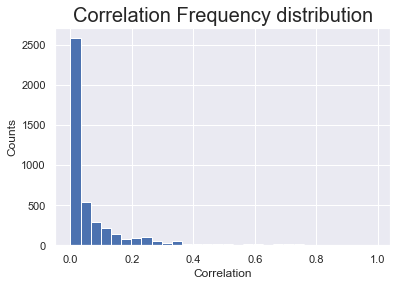

In [263]:
def correlation_counts(data):
    cormet = data.corr().round(3).abs()
    upper_tri = np.triu_indices(n=cormet.shape[0])
    corr_v = cormet.to_numpy()[upper_tri]
    plt.hist(x=corr_v, bins=30, range=[0.00, 0.99])
    plt.xlabel("Correlation")
    plt.ylabel("Counts")
    plt.grid(True)
    plt.title("Correlation Frequency distribution", fontsize = 20)
    plt.show()

correlation_counts(X)

# <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Oversampling

In [264]:
# using smote oversampling to correct unbalanced data
#smote = SMOTE()
#X,y=smote.fit_resample(X,y)
#sns.countplot(x=y)
#plt.title('Bankruptcy Counts after Correction', fontsize = 15)
#plt.show()

#Split data into 60:20:20
#x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
#x_train,x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.25,stratify=y_train,random_state=42)

#print(x_train.shape)
#print(x_valid.shape)
#print(x_test.shape)

#len(X)/len(y) == 1 #True for data is balanced

# <span style="font-family: Arial;font-size:1.2em;color:#3366ff">OutliersRemoval

In [265]:
#def rm_outliers(data):
    #data = sorted(data)
    #Q1,Q3 = np.percentile(data,[25,75])
    #IQR = Q3 - Q1
    #low = Q1 - IQR * 1.5
    #up = Q3 + IQR * 1.5
    #return low,up

#Update data which value exceed upper or lower bound to its upper or lower bound!
#def update(data):
    #for i in data.columns:
        #low,up = rm_outliers(data[i])
        #data[i] = np.where(data[i] > up, up, data[i])
        #data[i] = np.where(data[i] < low, low, data[i])
        #return data
    
#X = update(X)
#X.plot(kind="box",figsize = (18, 5))
#plt.xticks([])
#print("WE ARE DONE WITH OUTLIERS!")

# <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Scaling
Scaling data for DNN

In [266]:
# Use MinMaxScaler to scale data since there are huge ranges between those data
# We need this scaling for DNN
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scale,y,test_size=0.2,stratify=y,random_state=42)
x_train,x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.25,stratify=y_train,random_state=42)

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(4091, 95)
(1364, 95)
(1364, 95)


# <span style="font-family: Arial;font-size:1.2em;color:#3366ff">DimensionReduction

(4091, 56)
(1364, 56)
(1364, 56)


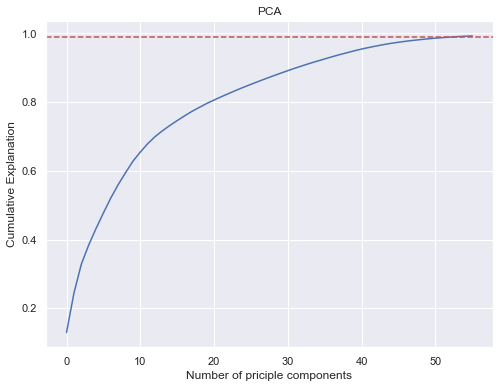

In [267]:
#56 principle components account for 99% explained data total variance
pca = PCA(n_components=56, svd_solver='full')

X_train = pca.fit_transform(x_train)
X_valid = pca.fit_transform(x_valid)
X_test = pca.fit_transform(x_test)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

plt.figure(figsize = (8,6))
plt.title("PCA")
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("Number of priciple components")
plt.ylabel("Cumulative Explanation")
plt.axhline(y=0.99, color='r', linestyle='--')
plt.show()

We can easily observe that after PCA, all data correlations are removed.

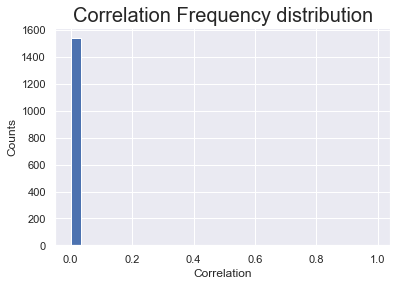

In [268]:
correlation_counts(pd.DataFrame(X_train))

# <span style="font-family: Arial;font-size:1.2em;color:#3366ff">Implementation

### <span style="font-family: Arial;font-size:1.2em;color:#3366ff">DNN

In [269]:
# Use Earlt stopping to eliminate useless epochs
model_stop = EarlyStopping(monitor='val_accuracy',
                           mode='max', 
                           verbose=1, 
                           patience=5,
                           restore_best_weights=True)
#I chose Dropout = 0.1 to decrease the probability of overfitting
model =  Sequential()
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(units=1,activation='sigmoid'))

# compile ANN
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [270]:
mymodel = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_test, y_test),
                    callbacks=[model_stop],
                   verbose = 0)

Restoring model weights from the end of the best epoch.
Epoch 00007: early stopping


In [271]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               12288     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
Total params: 20,609
Trainable params: 20,609
Non-trainable params: 0
_________________________________________________________________


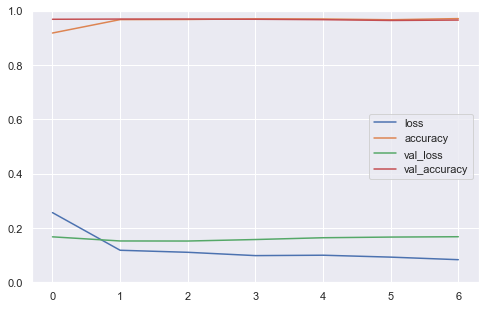

In [272]:
#This part of codes is from our lecture
pd.DataFrame(mymodel.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.67      0.05      0.09        44

    accuracy                           0.97      1364
   macro avg       0.82      0.52      0.53      1364
weighted avg       0.96      0.97      0.95      1364

We have f1-score :  0.08510638297872342


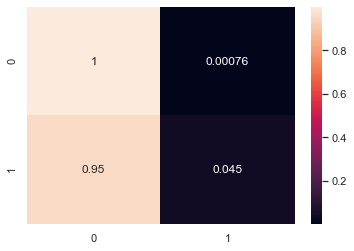

In [273]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred,normalize='true'), annot=True)
print("We have f1-score : ",f1_score(y_test, y_pred))

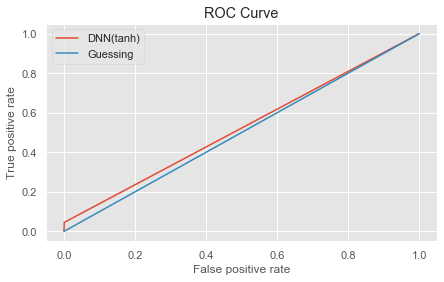

In [274]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
with plt.style.context('ggplot'):
    plt.figure(figsize=(7,4))
    plt.plot(fpr, tpr, [0,1], [0,1])
    plt.grid(True)
    plt.title('ROC Curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(['DNN(tanh)', 'Guessing'])

### <span style="font-family: Arial;font-size:1.2em;color:#3366ff">LogisticRegression

Use lr to evaluate on the validation set
auc: 0.8194559228650139
accuracy score: 0.9706744868035191
****************************************************************************************************
precision_micro: 0.9706744868035191	recall_micro: 0.9706744868035191	f1_micro: 0.9706744868035191
precision_macro: 0.8084656084656086	recall_macro: 0.6003787878787878	f1_macro: 0.6476817770889836
****************************************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0      0.974     0.996     0.985      1320
           1      0.643     0.205     0.310        44

    accuracy                          0.971      1364
   macro avg      0.808     0.600     0.648      1364
weighted avg      0.963     0.971     0.963      1364

Use lr to evaluate on the test set
auc: 0.934263085399449
accuracy score: 0.9633431085043989
*********************************************************

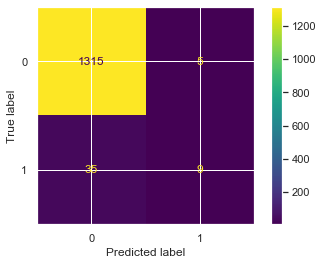

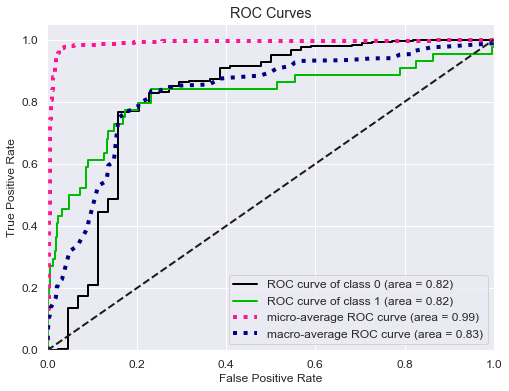

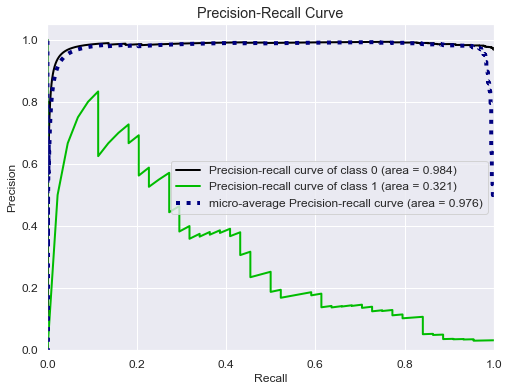

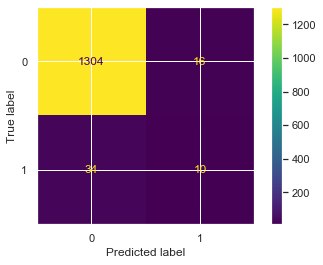

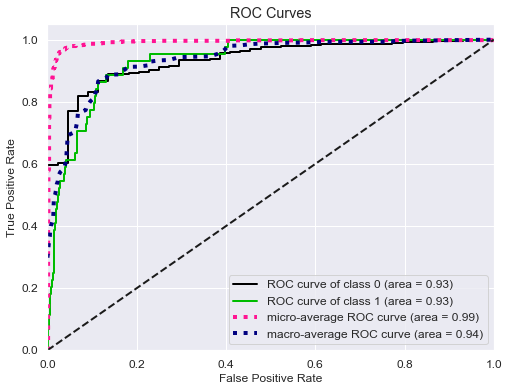

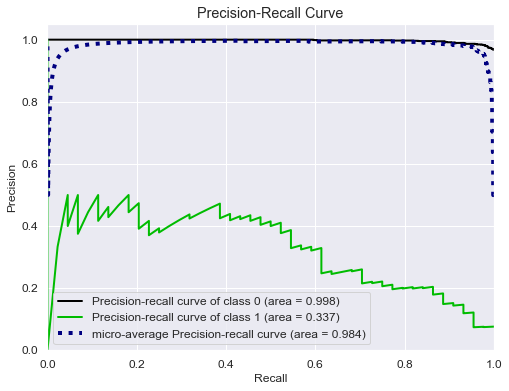

In [228]:
print('='*100)
print("Use lr to evaluate on the validation set")
lr_model = LogisticRegression()
model_eval(lr_model,x_train,y_train,x_valid,y_valid)
print('='*100)
print("Use lr to evaluate on the test set")
model_eval(lr_model,x_train,y_train,x_test,y_test)

### <span style="font-family: Arial;font-size:1.2em;color:#3366ff">KNN

In [229]:
error = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_knn = knn.predict(x_test)
    error.append(np.mean(pred_knn != y_test))

Text(0, 0.5, 'Error Rate')

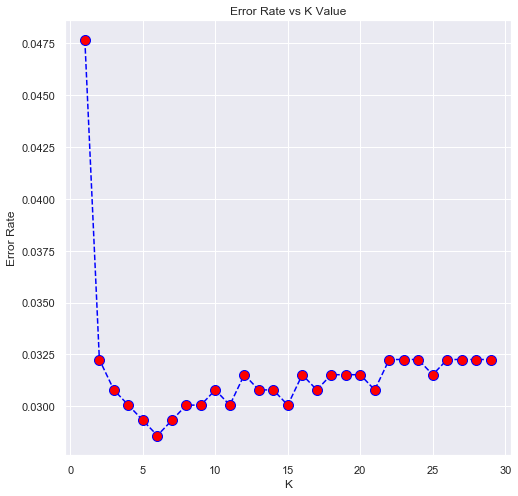

In [230]:
plt.figure(figsize = (8,8))
plt.plot(range(1,30), error, 
         color = 'blue', 
         linestyle = 'dashed', 
         marker = 'o', 
         markerfacecolor = 'red', 
         markersize = 10);
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Use knn to evaluate on the validation set
auc: 0.7553374655647384
accuracy score: 0.968475073313783
****************************************************************************************************
precision_micro: 0.968475073313783	recall_micro: 0.968475073313783	f1_micro: 0.968475073313783
precision_macro: 0.7709758921991788	recall_macro: 0.5443181818181818	f1_macro: 0.5703999941403533
****************************************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0      0.971     0.998     0.984      1320
           1      0.571     0.091     0.157        44

    accuracy                          0.968      1364
   macro avg      0.771     0.544     0.570      1364
weighted avg      0.958     0.968     0.957      1364

Use knn to evaluate on the test set
auc: 0.7972710055096419
accuracy score: 0.9714076246334311
**********************************************************

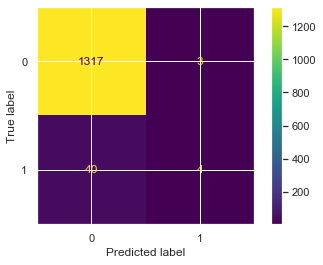

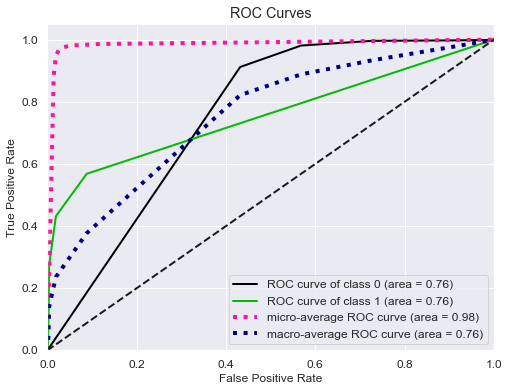

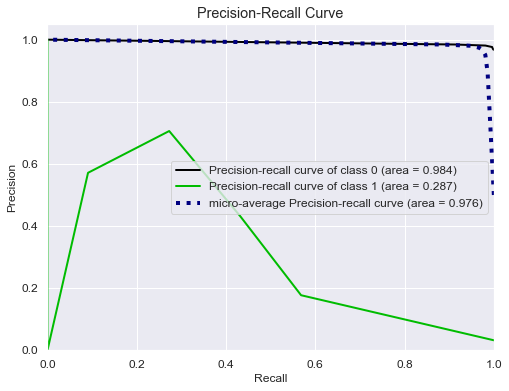

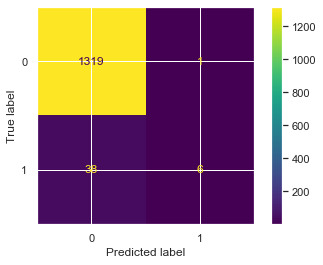

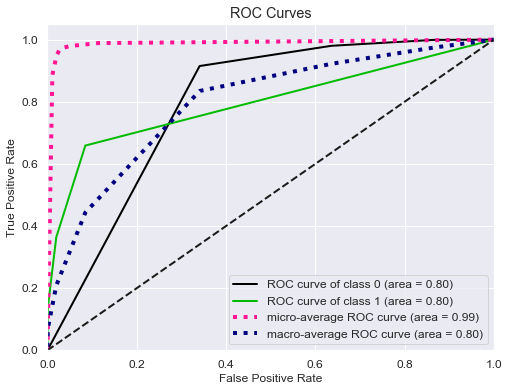

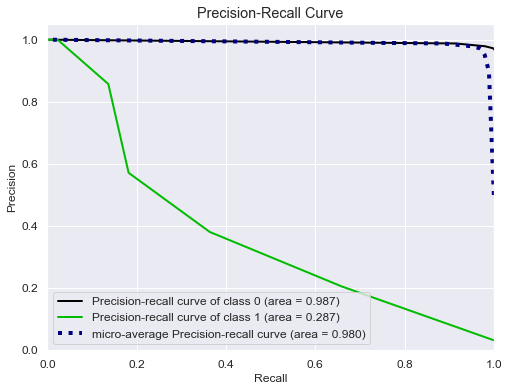

In [231]:
knn_model = KNeighborsClassifier(n_neighbors = 6)
print('='*100)
print("Use knn to evaluate on the validation set")
model_eval(knn_model,x_train,y_train,x_valid,y_valid)
print('='*100)
print("Use knn to evaluate on the test set")
model_eval(knn_model,x_train,y_train,x_test,y_test)

### <span style="font-family: Arial;font-size:1.2em;color:#3366ff">SVM

In [203]:
#params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                    #'C': [1, 10, 100, 1000]},
                    #{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


#svm = SVC(probability = True)
#svm = GridSearchCV(svm, params)

Use SVM to evaluate on the validation set
auc: 0.8261707988980715
accuracy score: 0.9706744868035191
****************************************************************************************************
precision_micro: 0.9706744868035191	recall_micro: 0.9706744868035191	f1_micro: 0.9706744868035191
precision_macro: 0.8609882005899705	recall_macro: 0.5674242424242424	f1_macro: 0.6079107738300563
****************************************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0      0.972     0.998     0.985      1320
           1      0.750     0.136     0.231        44

    accuracy                          0.971      1364
   macro avg      0.861     0.567     0.608      1364
weighted avg      0.965     0.971     0.961      1364

Use svm to evaluate on the test set
auc: 0.896926652892562
accuracy score: 0.967741935483871
********************************************************

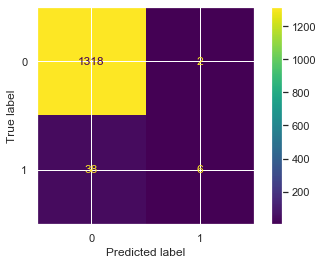

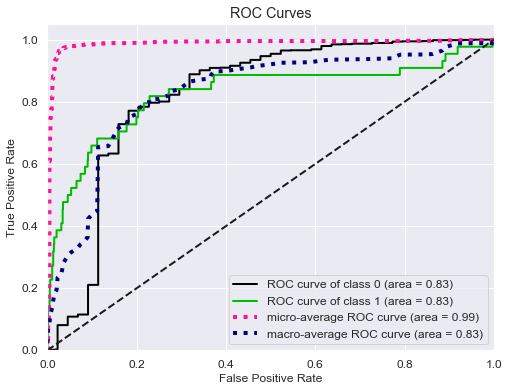

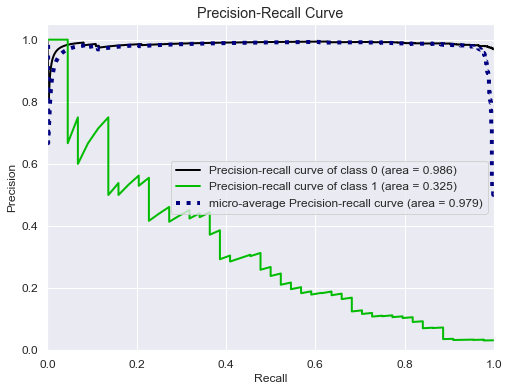

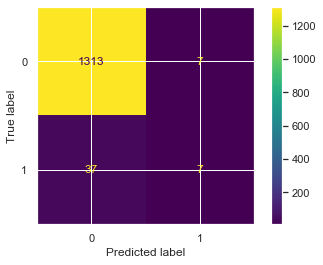

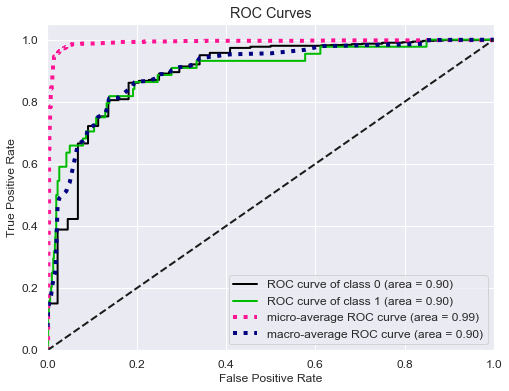

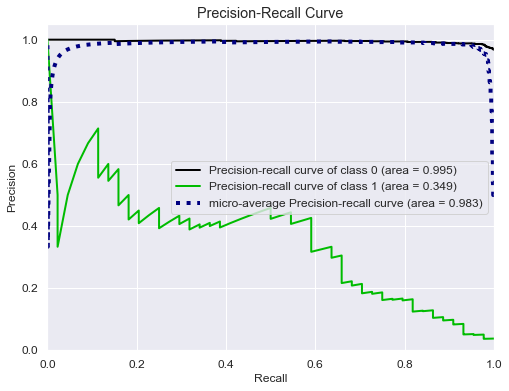

In [279]:
svm = SVC(probability = True, kernel = 'linear',C = 1, gamma = 1e-3)

print('='*100)
print("Use SVM to evaluate on the validation set")
model_eval(svm,x_train,y_train,x_valid,y_valid)
print('='*100)
print("Use svm to evaluate on the test set")
model_eval(svm,x_train,y_train,x_test,y_test)

### <span style="font-family: Arial;font-size:1.2em;color:#3366ff">XGBoost

Use XGBoost to evaluate on the validation set
[23:54:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
auc: 0.9162190082644628
accuracy score: 0.9699413489736071
****************************************************************************************************
precision_micro: 0.9699413489736071	recall_micro: 0.9699413489736071	f1_micro: 0.9699413489736071
precision_macro: 0.7814970086029958	recall_macro: 0.6109848484848485	f1_macro: 0.6562478870469061
****************************************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0      0.975     0.995     0.985      1320
           1      0.588     0.227     0.328        44

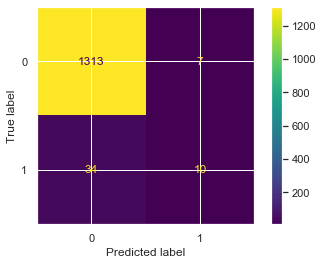

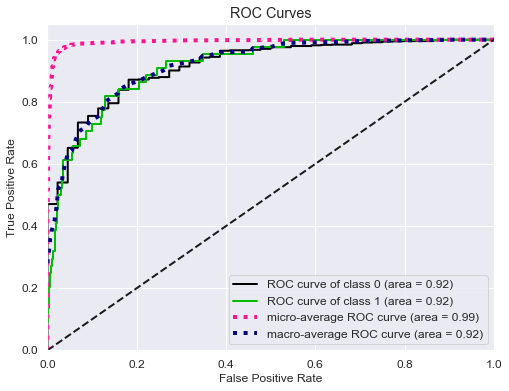

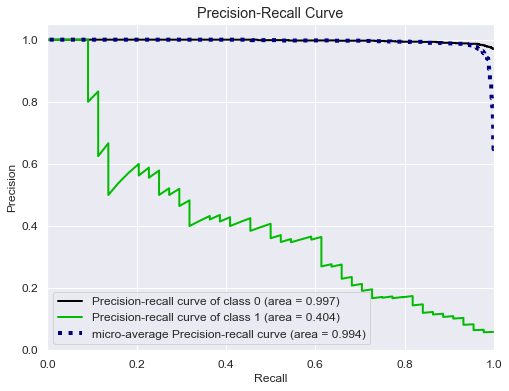

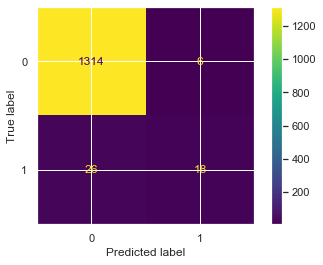

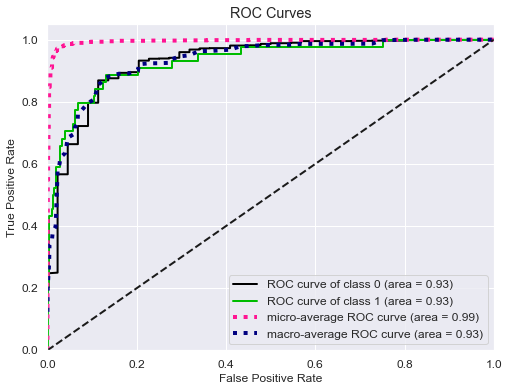

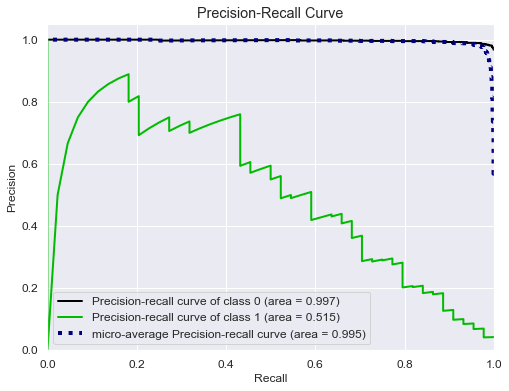

In [283]:
xgb = XGBClassifier(n_estimators = 1000)
print('='*100)
print("Use XGBoost to evaluate on the validation set")
model_eval(xgb,x_train,y_train,x_valid,y_valid)
print('='*100)
print("Use XGBoost to evaluate on the test set")
model_eval(xgb,x_train,y_train,x_test,y_test)

### <span style="font-family: Arial;font-size:1.2em;color:#3366ff">DecisionTree

Use DecisionTree to evaluate on the validation set
auc: 0.634090909090909
accuracy score: 0.9508797653958945
****************************************************************************************************
precision_micro: 0.9508797653958945	recall_micro: 0.9508797653958945	f1_micro: 0.9508797653958945
precision_macro: 0.6208659889811438	recall_macro: 0.6340909090909091	f1_macro: 0.6270714737507906
****************************************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0      0.976     0.973     0.975      1320
           1      0.265     0.295     0.280        44

    accuracy                          0.951      1364
   macro avg      0.621     0.634     0.627      1364
weighted avg      0.953     0.951     0.952      1364

Use DecisionTree to evaluate on the test set
auc: 0.6583333333333332
accuracy score: 0.9552785923753666
*************************************

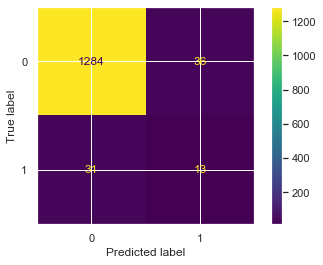

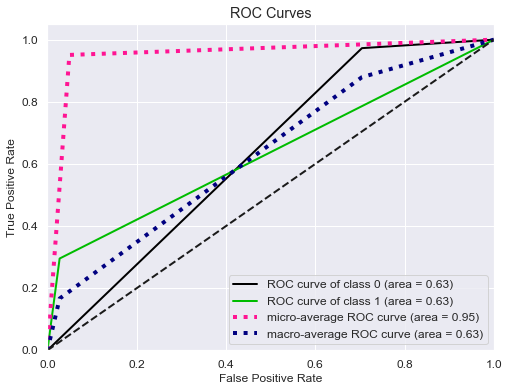

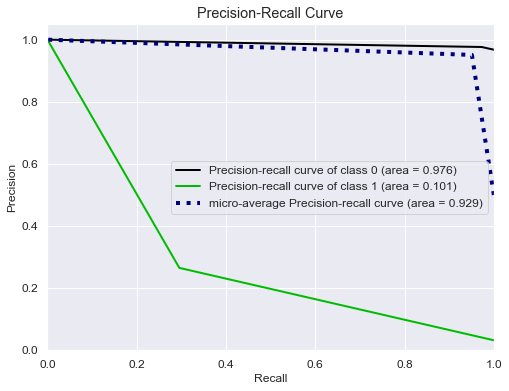

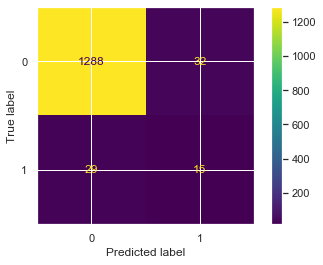

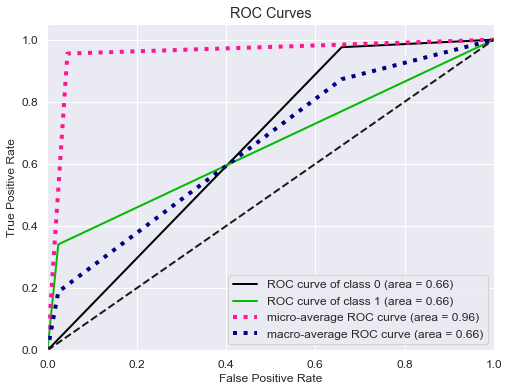

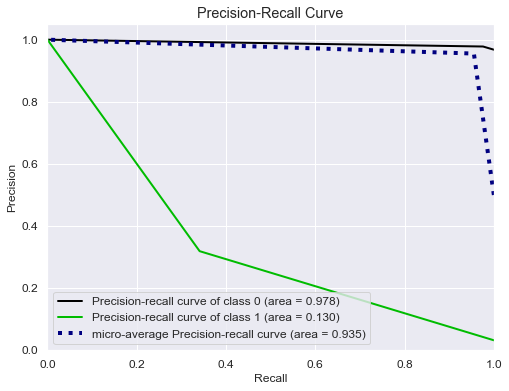

In [284]:
DTC = DecisionTreeClassifier()
print('='*100)
print("Use DecisionTree to evaluate on the validation set")
model_eval(DTC,x_train,y_train,x_valid,y_valid)
print('='*100)
print("Use DecisionTree to evaluate on the test set")
model_eval(DTC,x_train,y_train,x_test,y_test)

### <span style="font-family: Arial;font-size:1.2em;color:#3366ff">RandomForest

Use RandomForest to evaluate on the validation set
auc: 0.9173725895316803
accuracy score: 0.9721407624633431
****************************************************************************************************
precision_micro: 0.9721407624633431	recall_micro: 0.9721407624633431	f1_micro: 0.9721407624633431
precision_macro: 0.8867060561299853	recall_macro: 0.5901515151515152	f1_macro: 0.641042688163107
****************************************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0      0.973     0.998     0.986      1320
           1      0.800     0.182     0.296        44

    accuracy                          0.972      1364
   macro avg      0.887     0.590     0.641      1364
weighted avg      0.968     0.972     0.964      1364

Use RandomForest to evaluate on the test set
auc: 0.9111053719008264
accuracy score: 0.969208211143695
**************************************

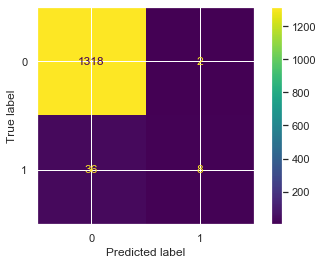

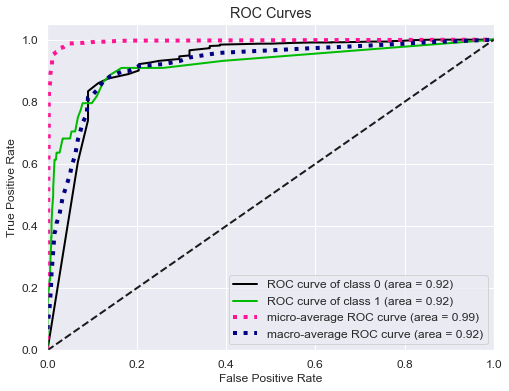

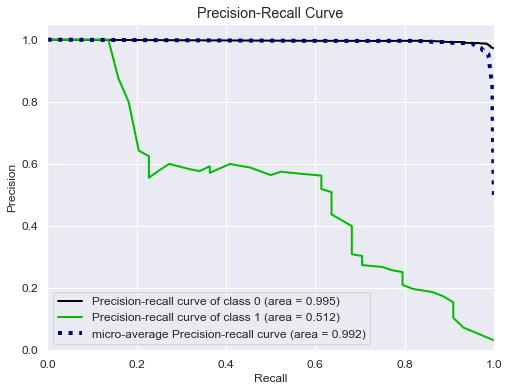

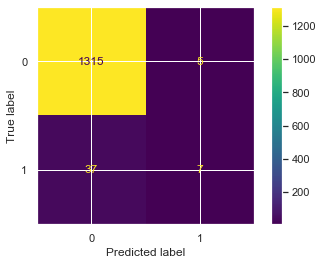

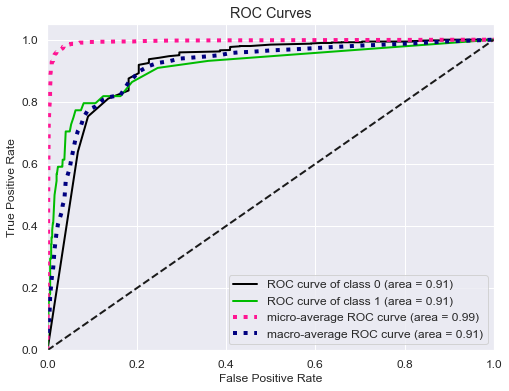

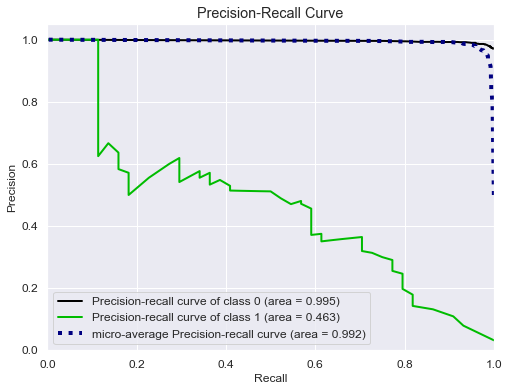

In [285]:
RFC = RandomForestClassifier()
print('='*100)
print("Use RandomForest to evaluate on the validation set")
model_eval(RFC,x_train,y_train,x_valid,y_valid)
print('='*100)
print("Use RandomForest to evaluate on the test set")
model_eval(RFC,x_train,y_train,x_test,y_test)

### <span style="font-family: Arial;font-size:1.2em;color:#3366ff">GradientBoosting

Use GradientBoostingClassifier to evaluate on the validation set
auc: 0.9332214187327824
accuracy score: 0.9706744868035191
****************************************************************************************************
precision_micro: 0.9706744868035191	recall_micro: 0.9706744868035191	f1_micro: 0.9706744868035191
precision_macro: 0.7998887240356083	recall_macro: 0.6113636363636363	f1_macro: 0.6591704147926036
****************************************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0      0.975     0.995     0.985      1320
           1      0.625     0.227     0.333        44

    accuracy                          0.971      1364
   macro avg      0.800     0.611     0.659      1364
weighted avg      0.963     0.971     0.964      1364

Use GradientBoostingClassifier to evaluate on the test set
auc: 0.9269111570247934
accuracy score: 0.9706744868035191
********

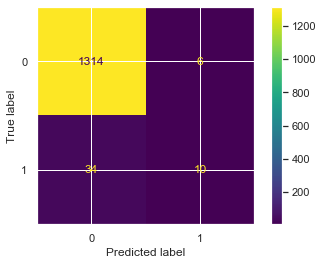

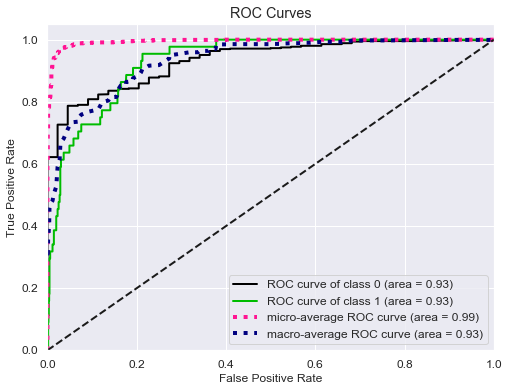

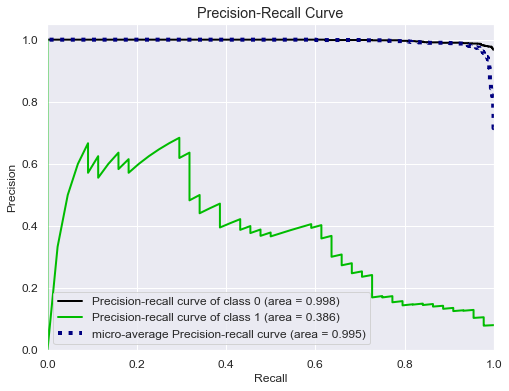

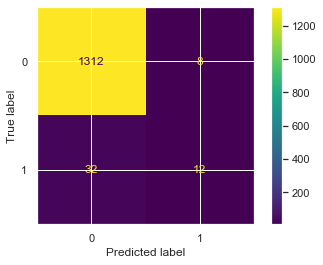

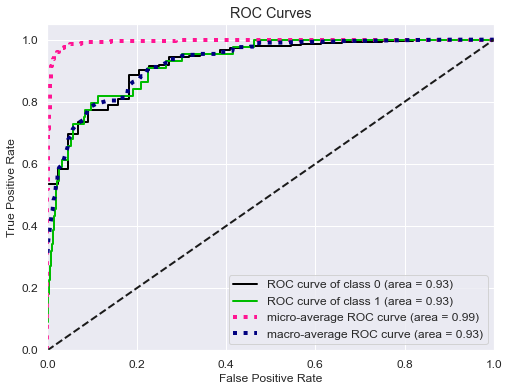

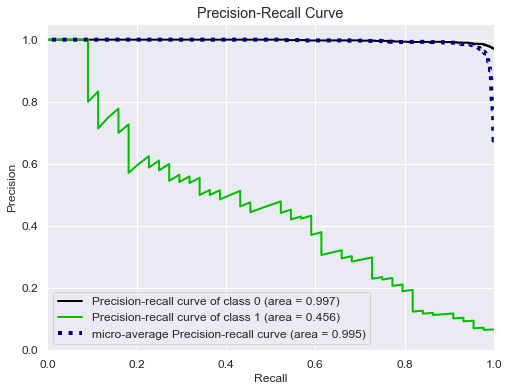

In [286]:
GBC = GradientBoostingClassifier()
print('='*100)
print("Use GradientBoostingClassifier to evaluate on the validation set")
model_eval(GBC,x_train,y_train,x_valid,y_valid)
print('='*100)
print("Use GradientBoostingClassifier to evaluate on the test set")
model_eval(GBC,x_train,y_train,x_test,y_test)

### <span style="font-family: Arial;font-size:1.2em;color:#3366ff">MLP

Use MLP to evaluate on the validation set
auc: 0.7850034435261708
accuracy score: 0.9640762463343109
****************************************************************************************************
precision_micro: 0.9640762463343109	recall_micro: 0.9640762463343109	f1_micro: 0.9640762463343109
precision_macro: 0.6873039581777446	recall_macro: 0.6079545454545454	f1_macro: 0.6357135460099962
****************************************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0      0.975     0.989     0.982      1320
           1      0.400     0.227     0.290        44

    accuracy                          0.964      1364
   macro avg      0.687     0.608     0.636      1364
weighted avg      0.956     0.964     0.959      1364

Use MLP to evaluate on the test set
auc: 0.8448347107438016
accuracy score: 0.9604105571847508
******************************************************

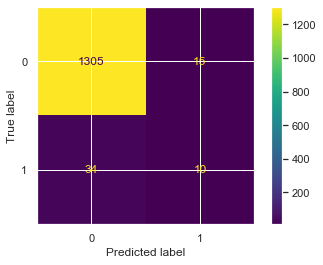

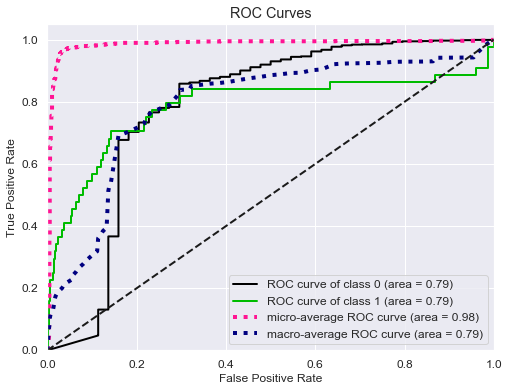

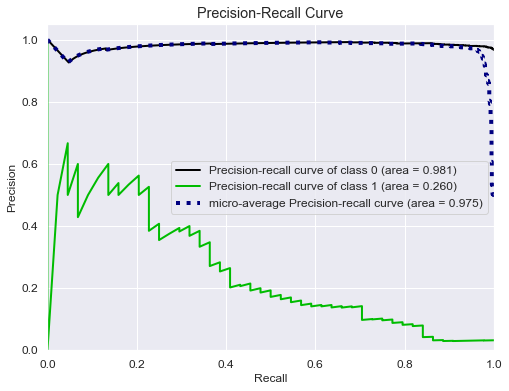

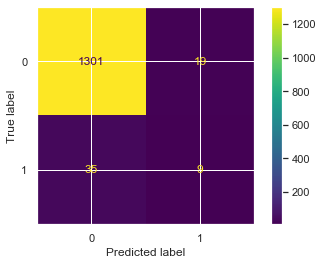

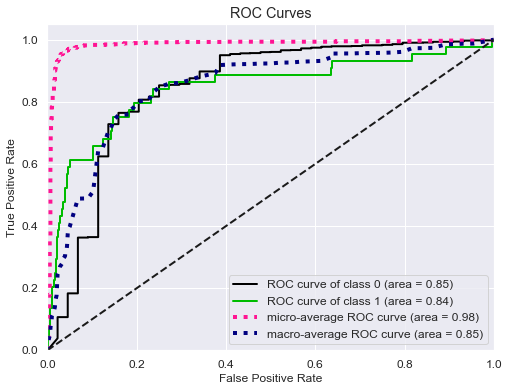

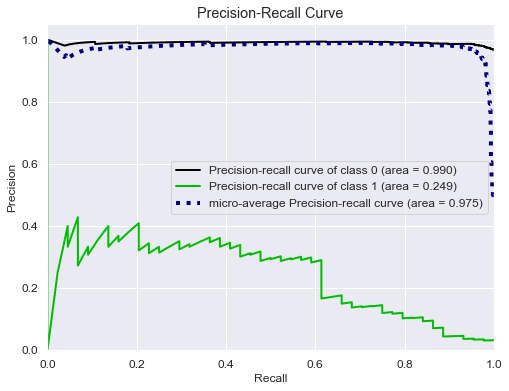

In [287]:
MLP = MLPClassifier()
print('='*100)
print("Use MLP to evaluate on the validation set")
model_eval(MLP,x_train,y_train,x_valid,y_valid)
print('='*100)
print("Use MLP to evaluate on the test set")
model_eval(MLP,x_train,y_train,x_test,y_test)

### <span style="font-family: Arial;font-size:1.2em;color:#3366ff">CatBoostClassifier

Use CAT to evaluate on the validation set
auc: 0.9442665289256199
accuracy score: 0.9721407624633431
****************************************************************************************************
precision_micro: 0.9721407624633431	recall_micro: 0.9721407624633431	f1_micro: 0.9721407624633431
precision_macro: 0.8445502645502645	recall_macro: 0.6121212121212121	f1_macro: 0.6652976882345344
****************************************************************************************************
Classification Report: 
               precision    recall  f1-score   support

           0      0.975     0.997     0.986      1320
           1      0.714     0.227     0.345        44

    accuracy                          0.972      1364
   macro avg      0.845     0.612     0.665      1364
weighted avg      0.966     0.972     0.965      1364

Use CAT to evaluate on the test set
auc: 0.9350034435261708
accuracy score: 0.9699413489736071
******************************************************

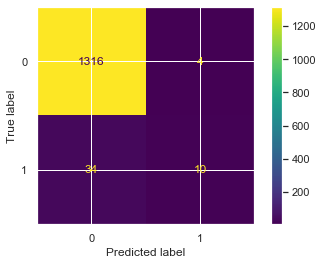

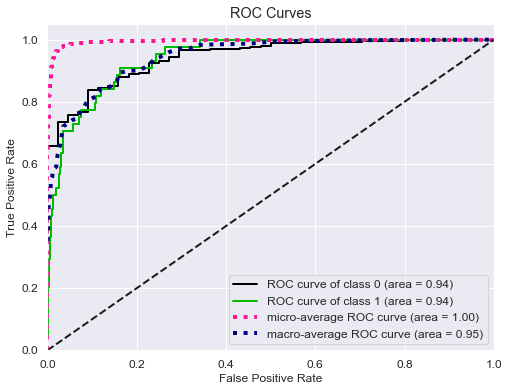

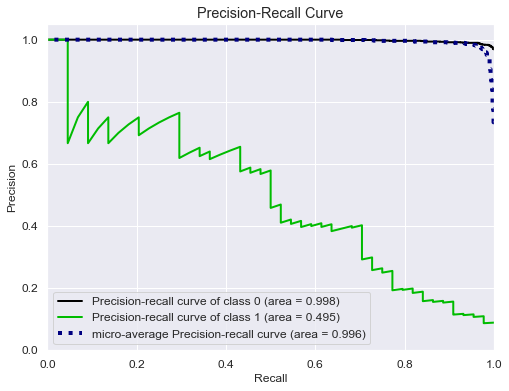

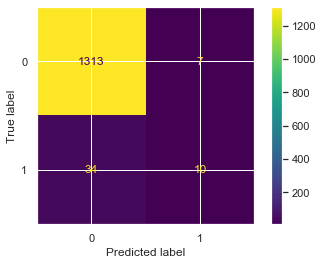

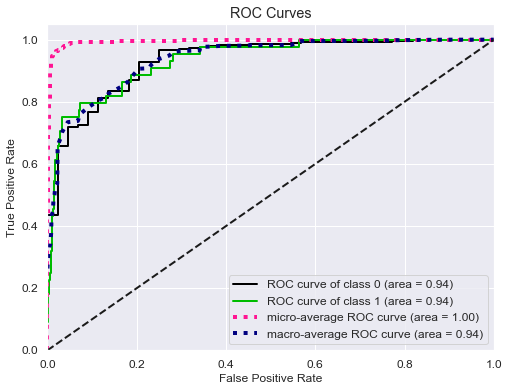

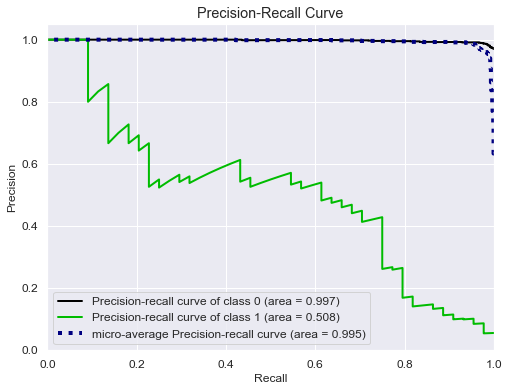

In [290]:
CAT = CatBoostClassifier(n_estimators=300,verbose = 0)
print('='*100)
print("Use CAT to evaluate on the validation set")
model_eval(CAT,x_train,y_train,x_valid,y_valid)
print('='*100)
print("Use CAT to evaluate on the test set")
model_eval(CAT,x_train,y_train,x_test,y_test)